# Xiaowei Zhao  UNI:xz2767

## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# columns=['Lot Frontage', 'Lot Area', 'Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2',
#          'Bsmt Unf SF','Total Bsmt SF','1st Flr SF', '2nd Flr SF','Low Qual Fin SF',
#         'Gr Liv Area','Garage Area', 'Wood Deck SF', 'Open Porch SF','Enclosed Porch',
#         '3-Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice'
data=pd.read_excel('AmesHousing.xls')
df = pd.DataFrame({'Lot Frontage':data['Lot Frontage'], 'Lot Area':data['Lot Frontage'],'Mas Vnr Area':data['Mas Vnr Area'],'BsmtFin SF 1':data['BsmtFin SF 1'],
                   'BsmtFin SF 2':data['BsmtFin SF 2'],'Bsmt Unf SF':data['Bsmt Unf SF'],'Total Bsmt SF':data['Total Bsmt SF'],'1st Flr SF':data['1st Flr SF'], '2nd Flr SF':data['2nd Flr SF']
                   ,'Low Qual Fin SF':data['Low Qual Fin SF'],'Gr Liv Area':data['Gr Liv Area'],'Garage Area':data['Garage Area'], 'Wood Deck SF':data['Wood Deck SF'], 
                   'Open Porch SF':data['Open Porch SF'],'Enclosed Porch':data['Enclosed Porch'],'3-Ssn Porch':data['3Ssn Porch'],'Screen Porch':data['Screen Porch'],
                   'Pool Area':data['Pool Area'],'Misc Val':data['Misc Val'],'SalePrice':data['SalePrice']})

### 1.1

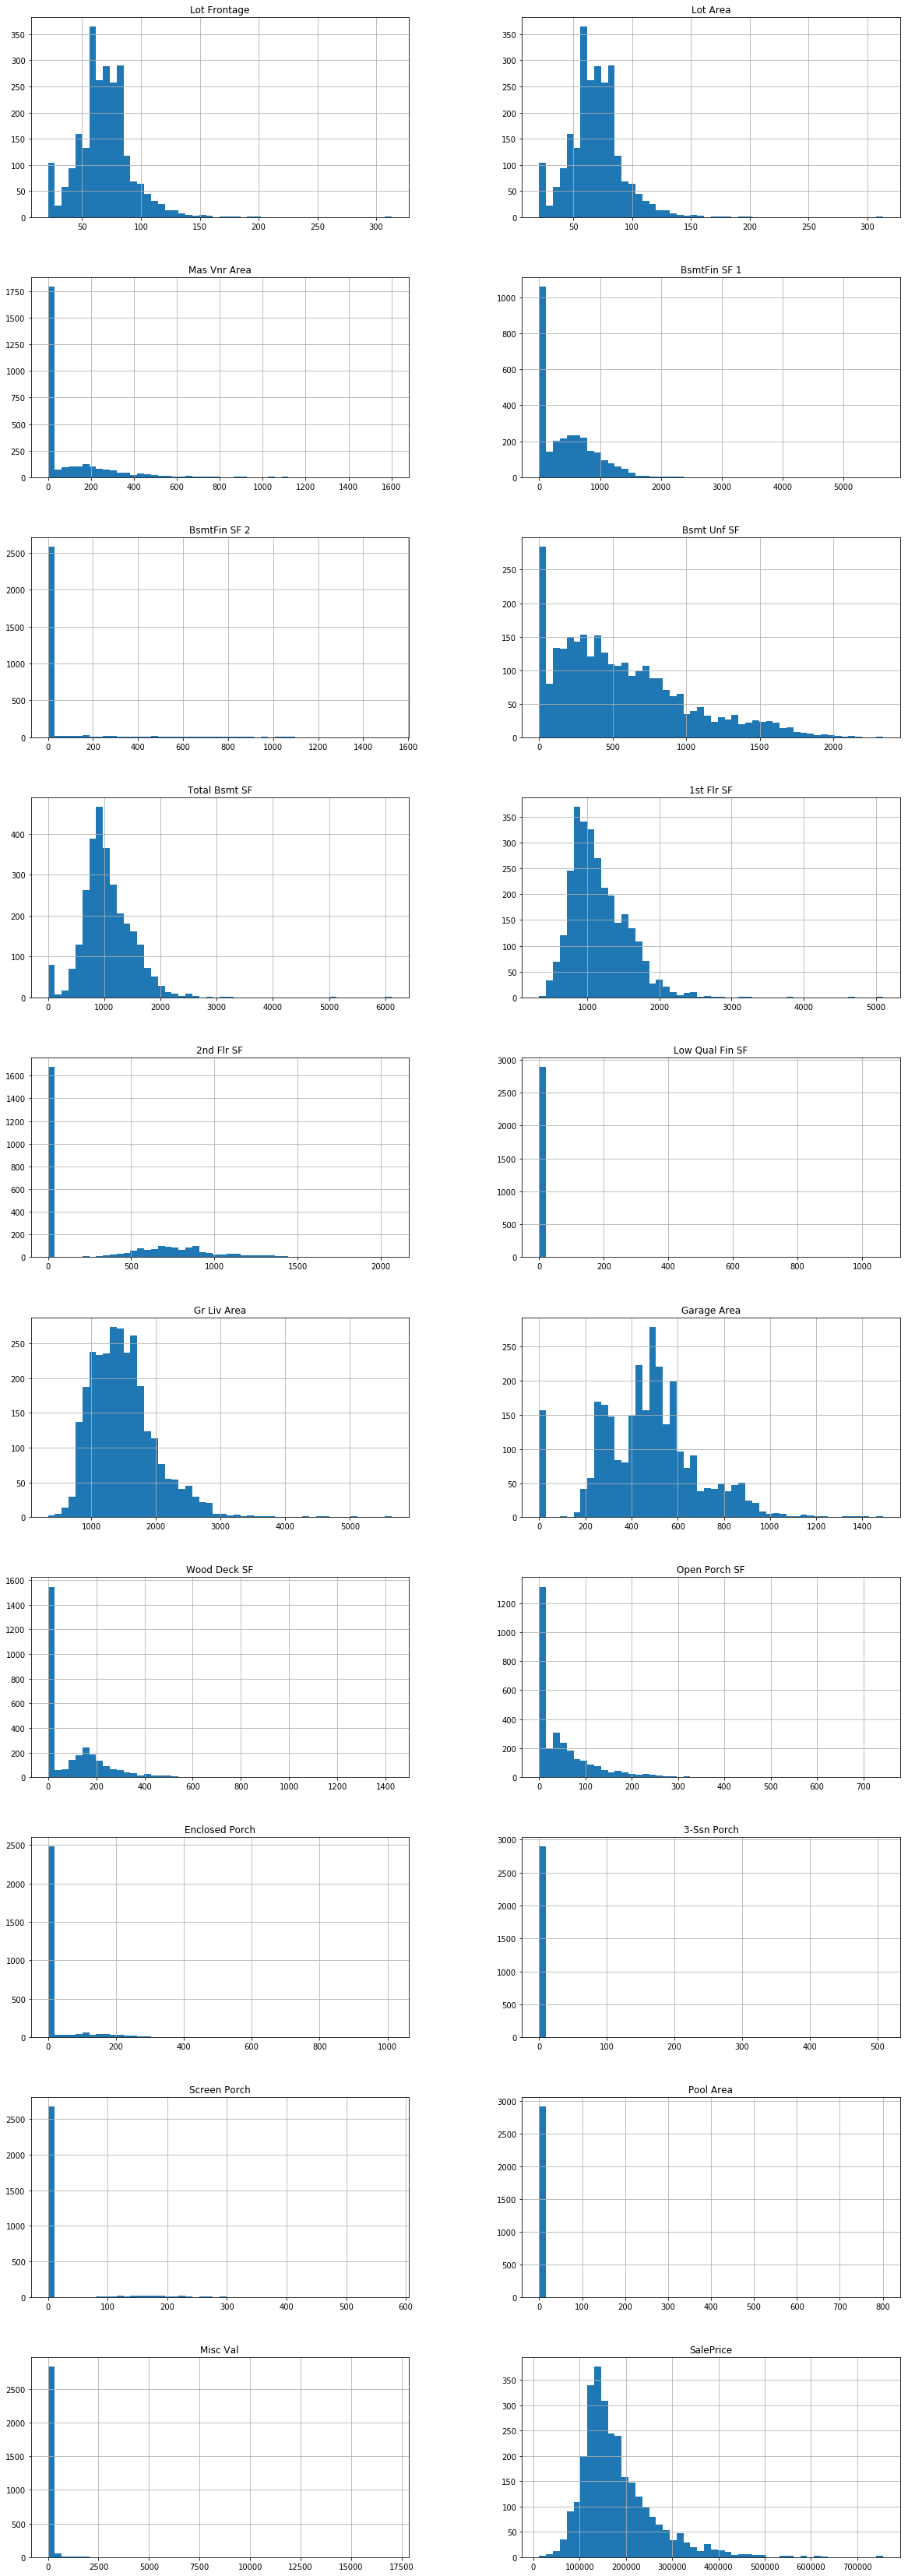

In [3]:
ncols = 2
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            df.hist(column=df.columns[counter],bins=50,ax=ax)
        else:
            ax.set_axis_off()

        counter += 1

#### I notice that all the variables are not normal distribution and there are a lot of variables have value 0. 
#### And Those variables which have a lot of zeros might require special treatment such as imputing.

### 1.2

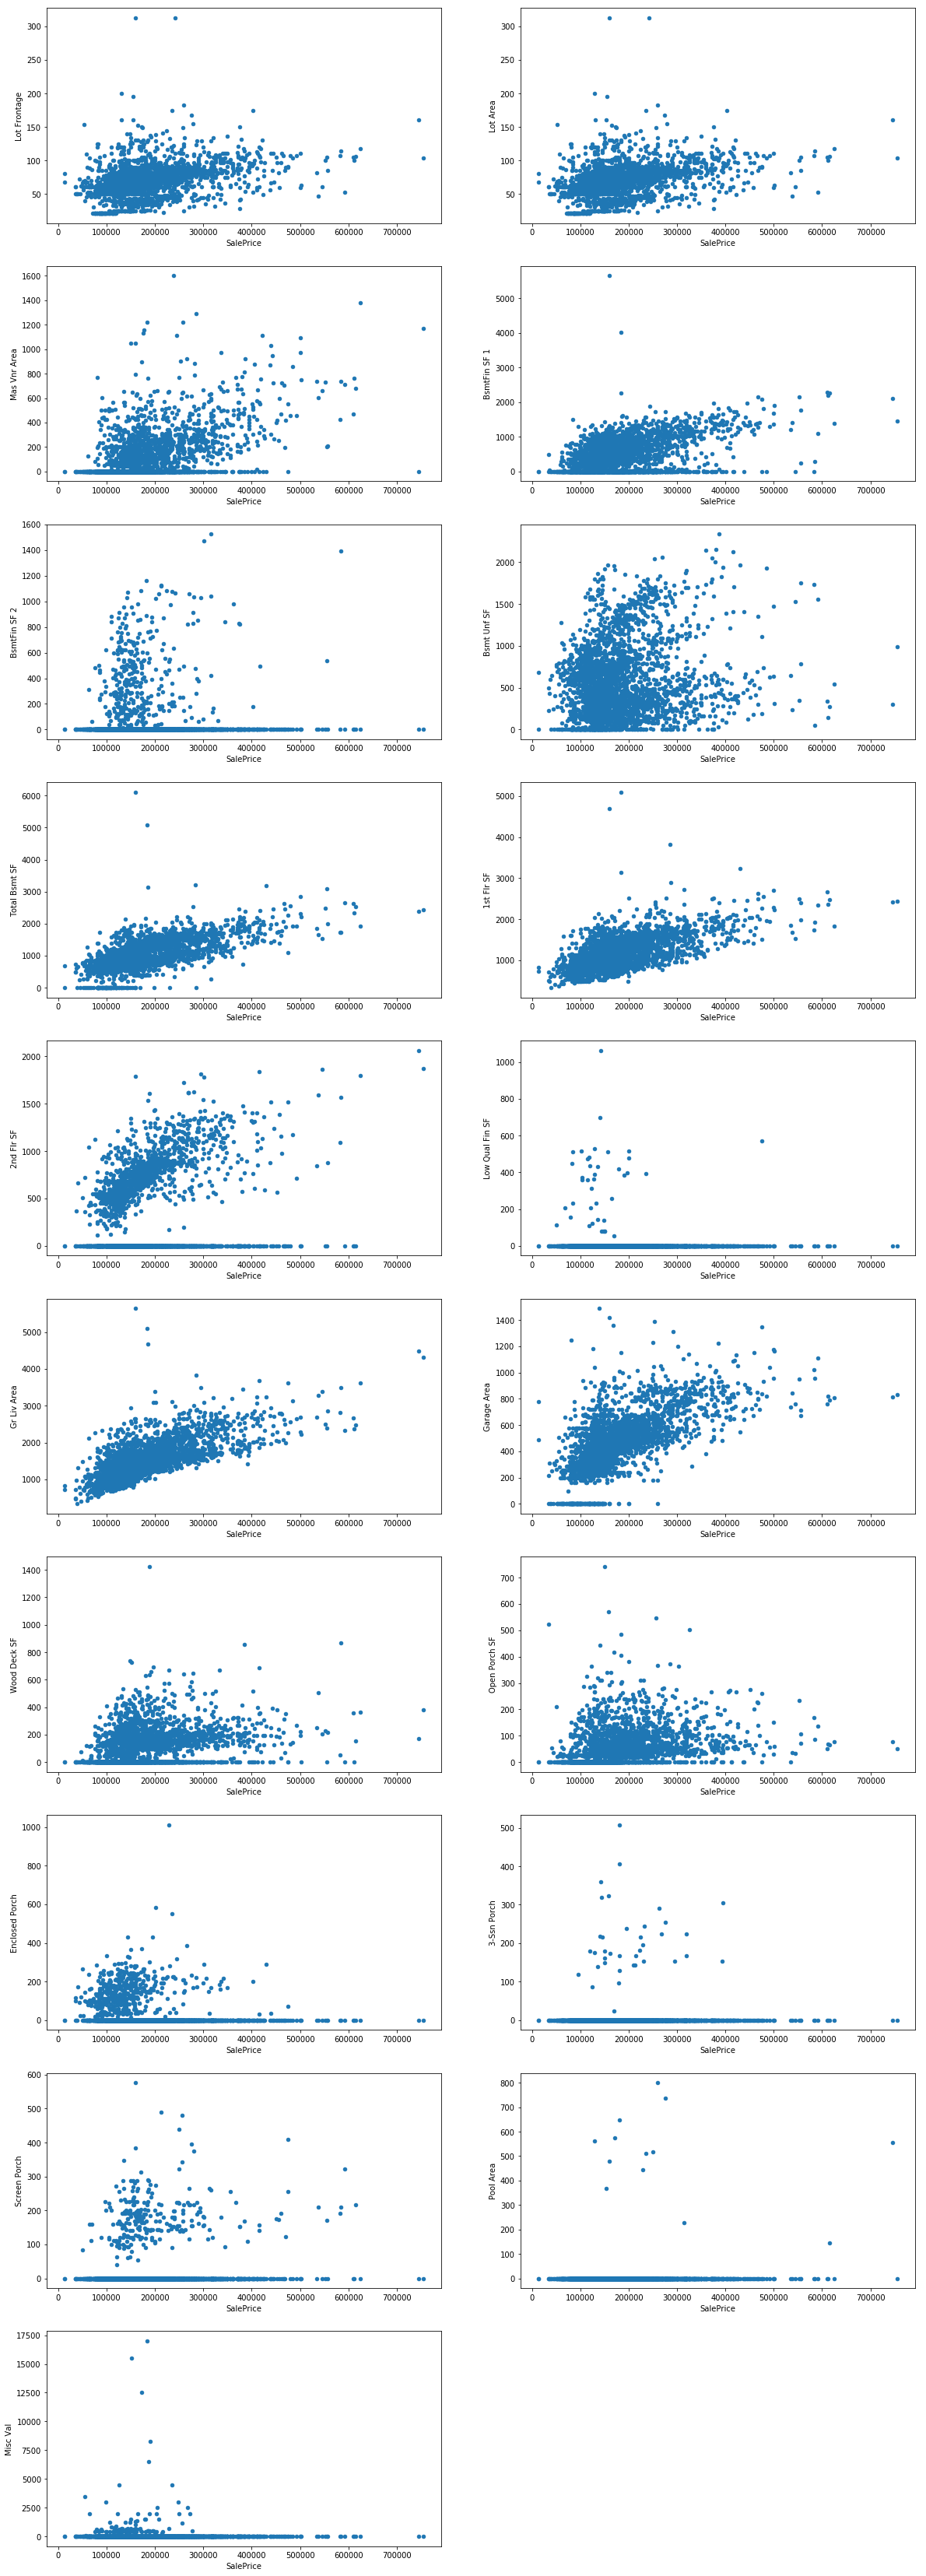

In [4]:
ncols = 2
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns)-1:
            df.plot.scatter(df.columns[-1],df.columns[counter],ax=ax)
        else:
            ax.set_axis_off()

        counter += 1

### 1.3

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

categorical = data.dtypes == object
cat=data.columns[categorical.values.tolist()]
R2=[]
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data[['SalePrice']])
for i in cat:
    df = pd.DataFrame({i: X_train[i]})
    dfnew=pd.get_dummies(df)
    df = pd.concat([y_train, dfnew], axis=1)
    make_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), LinearRegression())
    scores = cross_val_score(make_pipe, df.iloc[:,1:], df.iloc[:,0], cv=5,scoring = "r2")
    R2.append(np.mean(scores))

In [22]:
top_3_idx = np.argsort(R2)
top_3_features = [cat[i] for i in top_3_idx][-3:]
top_3_r2 =[R2[i] for i in top_3_idx ][-3:]
print(top_3_features)

['Garage Finish', 'Bsmt Qual', 'Exter Qual']


Text(0, 0.5, 'Sales price')

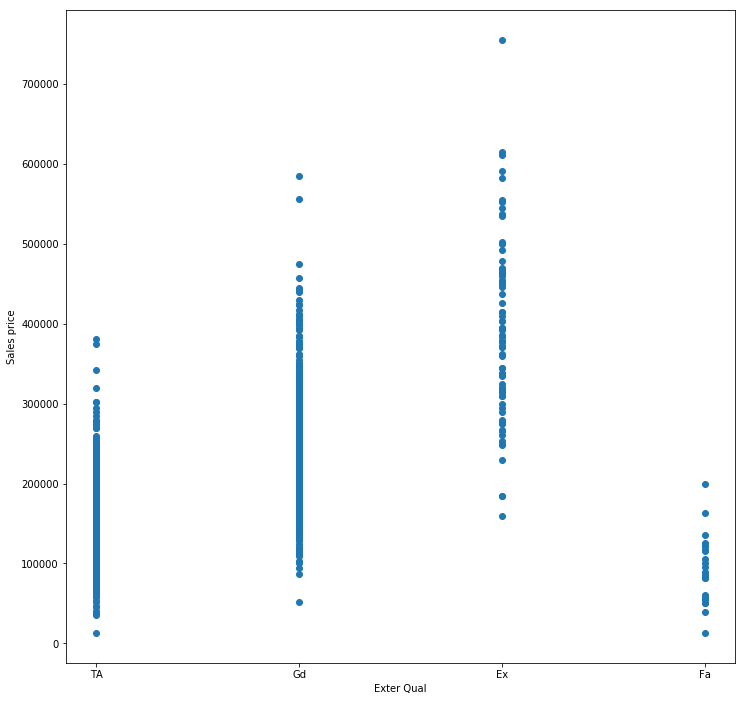

In [30]:
new=pd.concat([y_train, X_train[cat[R2.index(max(R2))]]], axis=1)
imp=SimpleImputer(strategy='most_frequent').fit(new)
new1=imp.transform(new)
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(new1[:,1],new1[:,0])
plt.xlabel(cat[R2.index(max(R2))])
plt.ylabel('Sales price')

Text(0, 0.5, 'Sales price')

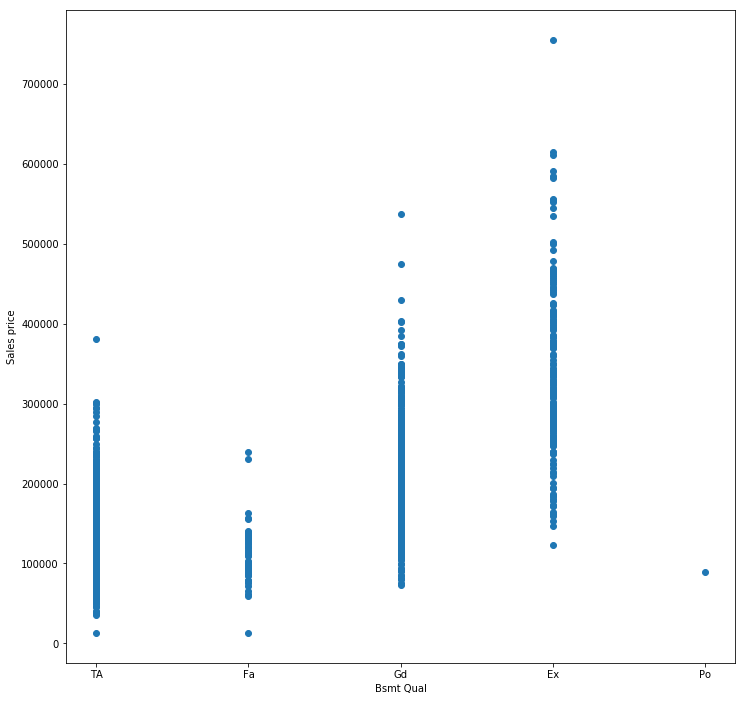

In [26]:
new=pd.concat([y_train, X_train[top_3_features[1]]], axis=1)
imp=SimpleImputer(strategy='most_frequent').fit(new)
new1=imp.transform(new)
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(new1[:,1],new1[:,0])
plt.xlabel(top_3_features[1])
plt.ylabel('Sales price')

Text(0, 0.5, 'Sales price')

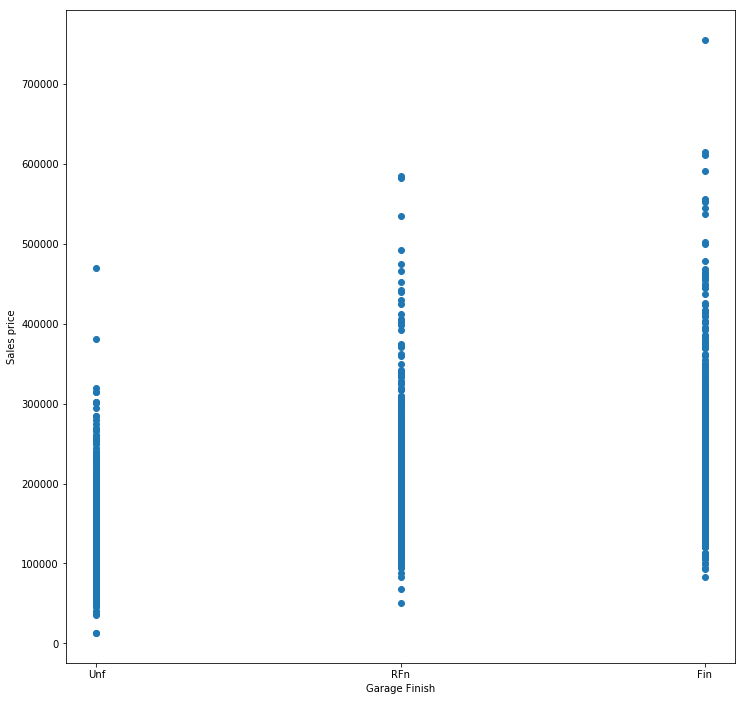

In [27]:
new=pd.concat([y_train, X_train[top_3_features[0]]], axis=1)
imp=SimpleImputer(strategy='most_frequent').fit(new)
new1=imp.transform(new)
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(new1[:,1],new1[:,0])
plt.xlabel(top_3_features[0])
plt.ylabel('Sales price')

### 1.4

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

categorical = data.dtypes == object
cat=data.columns[categorical.values.tolist()]
R2=[]
values=dict(zip(cat,['none']*len(cat)))
data=data.reset_index()
data=data.fillna(value=values)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data[['SalePrice']])

categorical = X_train.dtypes == object
newpipeline=make_pipeline(SimpleImputer(missing_values=np.nan,strategy='mean'))
preprocess0 = make_column_transformer(
    (newpipeline,~categorical),
    (OneHotEncoder(handle_unknown='ignore'), categorical))
model_OLS_1 = make_pipeline(preprocess0, LinearRegression())
model_ridge_1 = make_pipeline(preprocess0, Ridge())
model_lasso_1 = make_pipeline(preprocess0, Lasso())
model_en_1 = make_pipeline(preprocess0, ElasticNet())

In [8]:
import warnings
warnings.filterwarnings('ignore')
print("Without scaling the data (within the pipeline) with StandardScaler")
scores_OLS = cross_val_score(model_OLS_1, X_train, y_train, cv=5,scoring = "r2")
print("Linear Regression mean of CV R^2: {}".format(np.mean(scores_OLS)))
scores_ridge = cross_val_score(model_ridge_1, X_train, y_train, cv=5,scoring = "r2")
print("Ridge Regression mean of CV R^2: {}".format(np.mean(scores_ridge)))
scores_lasso = cross_val_score(model_lasso_1, X_train, y_train, cv=5,scoring = "r2")
print("LASSO mean of CV R^2: {}".format(np.mean(scores_lasso)))
scores_en = cross_val_score(model_en_1, X_train, y_train, cv=5,scoring = "r2")
print("ElasticNet mean of CV R^2: {}".format(np.mean(scores_en)))

Without scaling the data (within the pipeline) with StandardScaler
Linear Regression mean of CV R^2: 0.6993527451585608
Ridge Regression mean of CV R^2: 0.00031998482528519114
LASSO mean of CV R^2: 0.8584534298048492
ElasticNet mean of CV R^2: 0.8285553884570567


In [9]:
newpipeline2=make_pipeline(SimpleImputer(missing_values=np.nan,strategy='mean'),StandardScaler())
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (newpipeline2, ~categorical),
    (OneHotEncoder(handle_unknown='ignore'), categorical))
model_OLS = make_pipeline(preprocess, LinearRegression())
model_ridge = make_pipeline(preprocess, Ridge())
model_lasso = make_pipeline(preprocess, Lasso())
model_en = make_pipeline(preprocess, ElasticNet())

In [10]:
print("With scaling the data (within the pipeline) with StandardScaler")
scores_OLS = cross_val_score(model_OLS, X_train, y_train, cv=5,scoring = "r2")
print("Linear Regression mean of CV R^2: {}".format(np.mean(scores_OLS)))
scores_ridge = cross_val_score(model_ridge, X_train, y_train, cv=5,scoring = "r2")
print("Ridge Regression mean of CV R^2: {}".format(np.mean(scores_ridge)))
scores_lasso = cross_val_score(model_lasso, X_train, y_train, cv=5,scoring = "r2")
print("LASSO mean of CV R^2: {}".format(np.mean(scores_lasso)))
scores_en = cross_val_score(model_en, X_train, y_train, cv=5,scoring = "r2")
print("ElasticNet mean of CV R^2: {}".format(np.mean(scores_en)))

With scaling the data (within the pipeline) with StandardScaler
Linear Regression mean of CV R^2: 0.852772733536467
Ridge Regression mean of CV R^2: 0.8598284374966042
LASSO mean of CV R^2: 0.8584911652485847
ElasticNet mean of CV R^2: 0.8350424221595407


#### Scaling the data (within the pipeline) with StandardScaler does help and it improves R^2 score

### 1.5

The best parameter for Ridge is: {'ridge__alpha': 3.1622776601683795}
The best R^2 for Ridge is: 0.8599079559574286


Text(0, 0.5, 'Score')

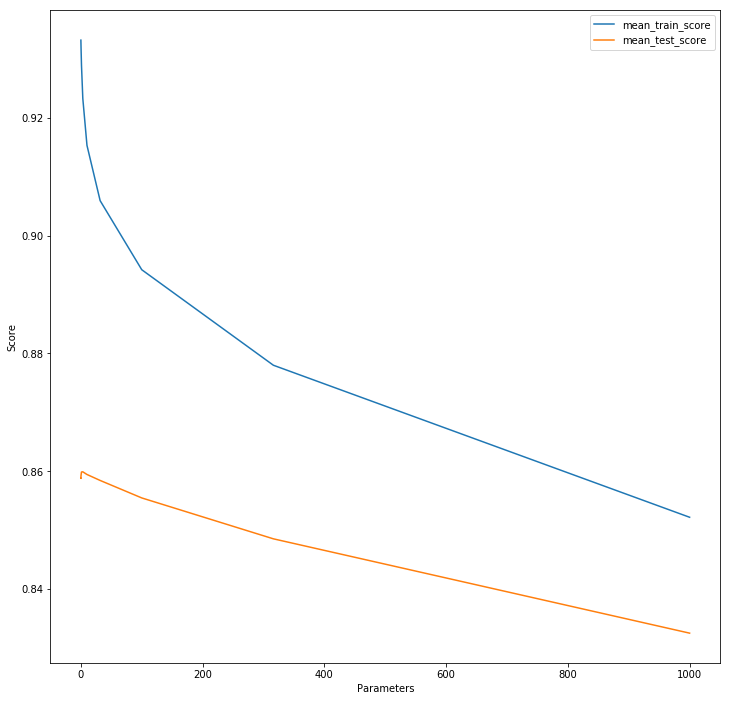

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'ridge__alpha': np.logspace(-3, 3, 13)}
grid_ridge = GridSearchCV(model_ridge, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)
print("The best parameter for Ridge is: {}".format(grid_ridge.best_params_))
print("The best R^2 for Ridge is: {}".format(grid_ridge.best_score_))
fig, axes = plt.subplots(figsize=(12, 12))
plt.plot(np.logspace(-3, 3, 13), grid_ridge.cv_results_['mean_train_score'],label='mean_train_score')
plt.plot(np.logspace(-3, 3, 13), grid_ridge.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend(loc='upper right')
plt.xlabel('Parameters')
plt.ylabel('Score')

The best parameter for LASSO is: {'lasso__alpha': 31.622776601683793}
The best R^2 for LASSO is: 0.8676547442916632


Text(0, 0.5, 'Score')

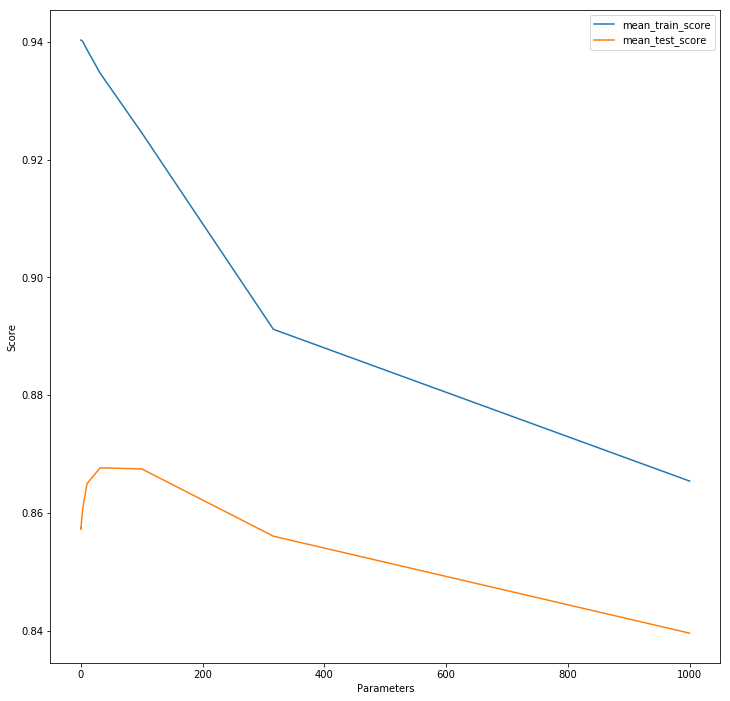

In [12]:
param_grid = {'lasso__alpha': np.logspace(-3, 3, 13)}
grid_lasso = GridSearchCV(model_lasso, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)
print("The best parameter for LASSO is: {}".format(grid_lasso.best_params_))
print("The best R^2 for LASSO is: {}".format(grid_lasso.best_score_))
fig, axes = plt.subplots(figsize=(12, 12))
plt.plot(np.logspace(-3, 3, 13), grid_lasso.cv_results_['mean_train_score'],label='mean_train_score')
plt.plot(np.logspace(-3, 3, 13), grid_lasso.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend(loc='upper right')
plt.xlabel('Parameters')
plt.ylabel('Score')


The best parameter for ElasticNet is: {'elasticnet__alpha': 0.001}
The best R^2 for ElasticNet is: 0.8610925026413684


Text(0, 0.5, 'Score')

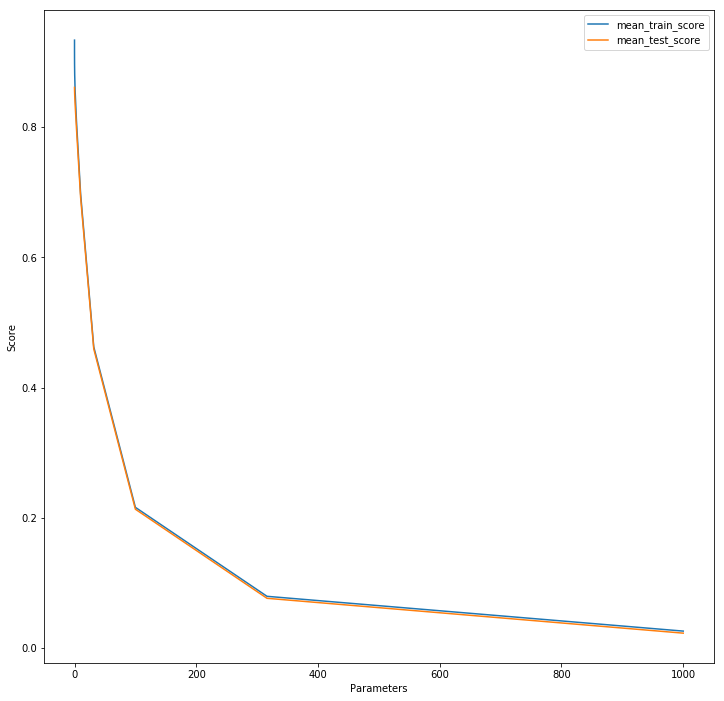

In [13]:
param_grid = {'elasticnet__alpha': np.logspace(-3, 3, 13)}
grid_en = GridSearchCV(model_en, param_grid, cv=5)
grid_en.fit(X_train, y_train)
print("The best parameter for ElasticNet is: {}".format(grid_en.best_params_))
print("The best R^2 for ElasticNet is: {}".format(grid_en.best_score_))
fig, axes = plt.subplots(figsize=(12, 12))
plt.plot(np.logspace(-3, 3, 13), grid_en.cv_results_['mean_train_score'],label='mean_train_score')
plt.plot(np.logspace(-3, 3, 13), grid_en.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend(loc='upper right')
plt.xlabel('Parameters')
plt.ylabel('Score')

#### The results do improve.

### 1.6

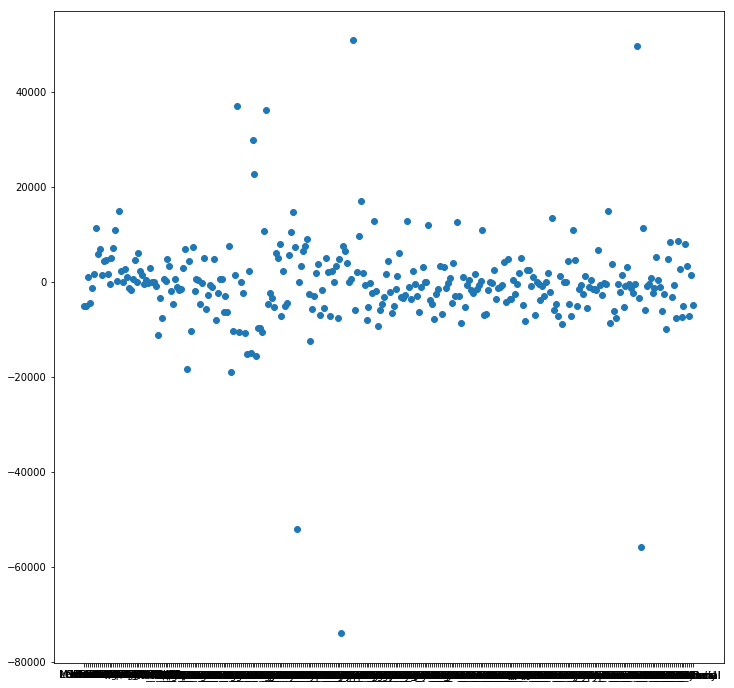

In [20]:
coef_ridge=grid_ridge.best_estimator_.named_steps['ridge'].coef_
feature2_ridge=grid_ridge.best_estimator_.steps[0][1].named_transformers_['onehotencoder'].get_feature_names()
cont = X_train.dtypes != object
feature1_ridge=X_train.columns[cont.values.tolist()]
feature_ridge=np.concatenate((feature1_ridge,feature2_ridge))
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(feature_ridge,coef_ridge.reshape(-1,1))

Text(0.5, 1.0, 'Top 10 feature for Ridge')

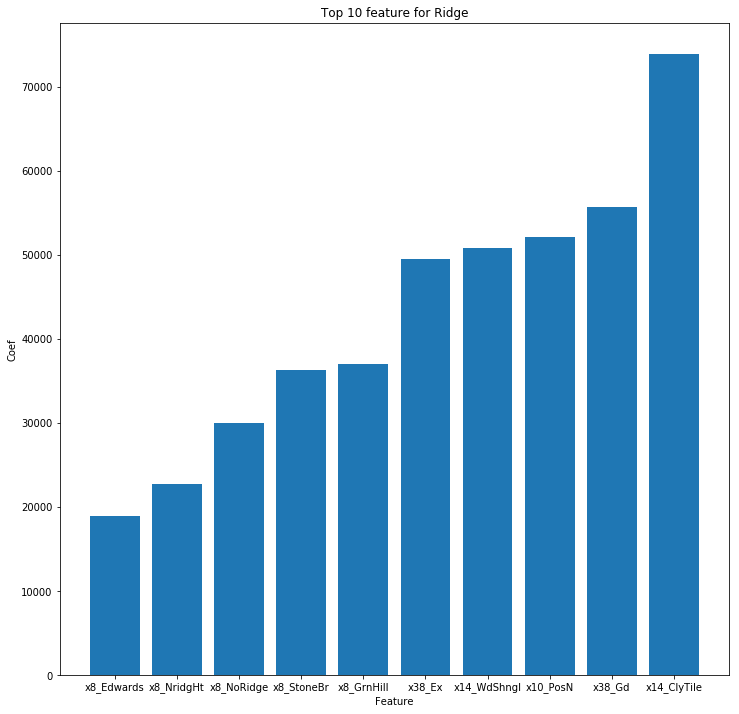

In [15]:
coef_ridge=np.abs(coef_ridge)
top_10_idx_ridge = np.argsort(coef_ridge)
top_10_features_ridge = [feature_ridge[i] for i in top_10_idx_ridge ][0][-10:]
top_10_coef_ridge=[coef_ridge[0][i] for i in top_10_idx_ridge ][0][-10:]
fig, axes = plt.subplots(figsize=(12, 12))
plt.bar(top_10_features_ridge, top_10_coef_ridge, align='center')
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Top 10 feature for Ridge')

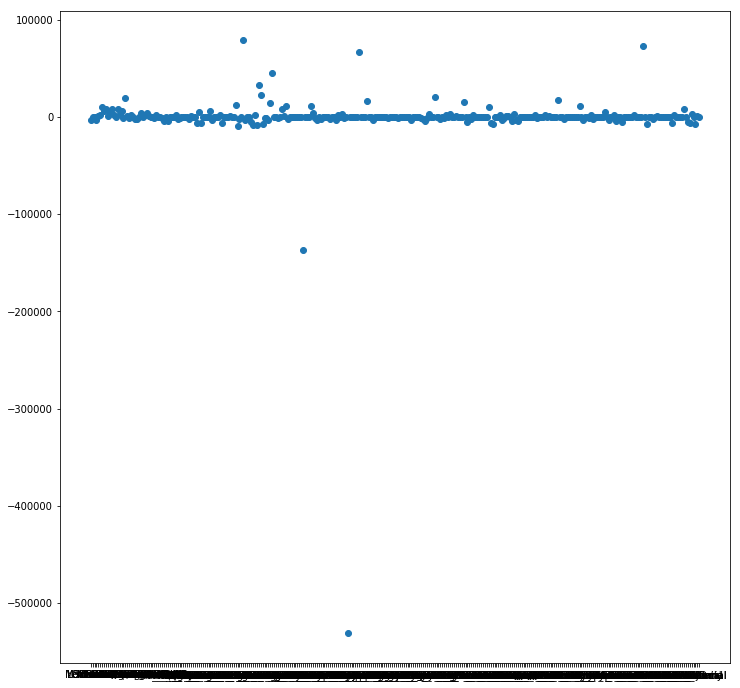

In [21]:
coef_lasso=grid_lasso.best_estimator_.named_steps['lasso'].coef_
feature2_lasso=grid_ridge.best_estimator_.steps[0][1].named_transformers_['onehotencoder'].get_feature_names()
cont = X_train.dtypes != object
feature1_lasso=X_train.columns[cont.values.tolist()]
feature_lasso=np.concatenate((feature1_lasso,feature2_lasso))
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(feature_lasso,coef_lasso.reshape(-1,1))

Text(0.5, 1.0, 'Top 10 feature for LASSO')

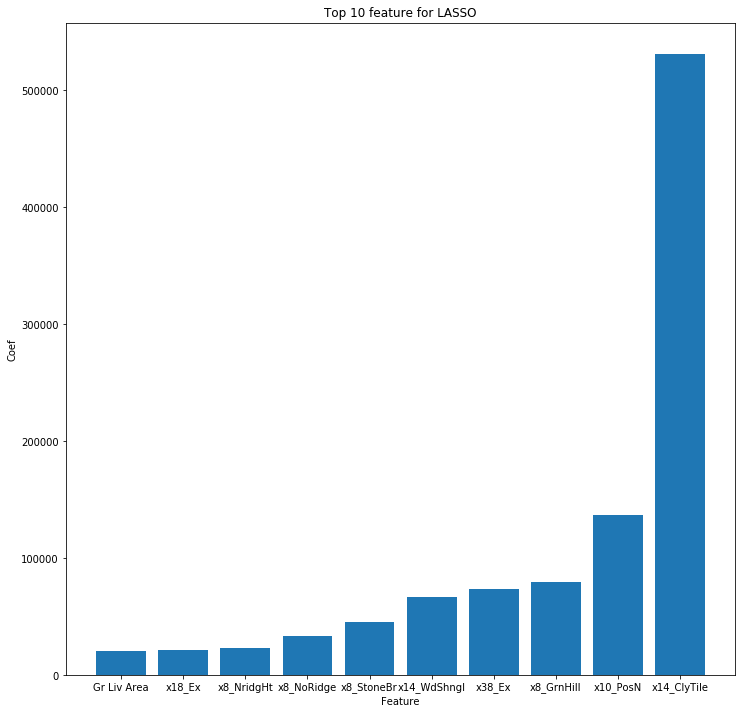

In [17]:
coef_lasso=np.abs(coef_lasso)
top_10_idx_lasso = np.argsort(coef_lasso)
top_10_features_lasso = [feature_lasso[i] for i in top_10_idx_lasso ][-10:]
top_10_coef_lasso=[coef_lasso[i] for i in top_10_idx_lasso ][-10:]
fig, axes = plt.subplots(figsize=(12, 12))
plt.bar(top_10_features_lasso, top_10_coef_lasso, align='center')
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Top 10 feature for LASSO')

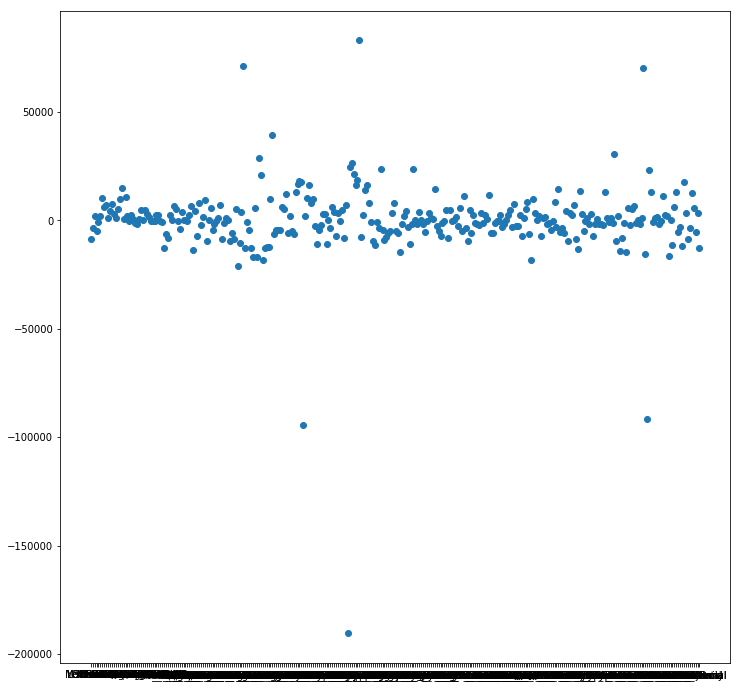

In [22]:
coef_en=grid_en.best_estimator_.named_steps['elasticnet'].coef_
feature2_en=grid_en.best_estimator_.steps[0][1].named_transformers_['onehotencoder'].get_feature_names()
cont = X_train.dtypes != object
feature1_en=X_train.columns[cont.values.tolist()]
feature_en=np.concatenate((feature1_en,feature2_en))
fig, axes = plt.subplots(figsize=(12, 12))
plt.scatter(feature_en,coef_en.reshape(-1,1))

Text(0.5, 1.0, 'Top 10 feature for ElasticNet')

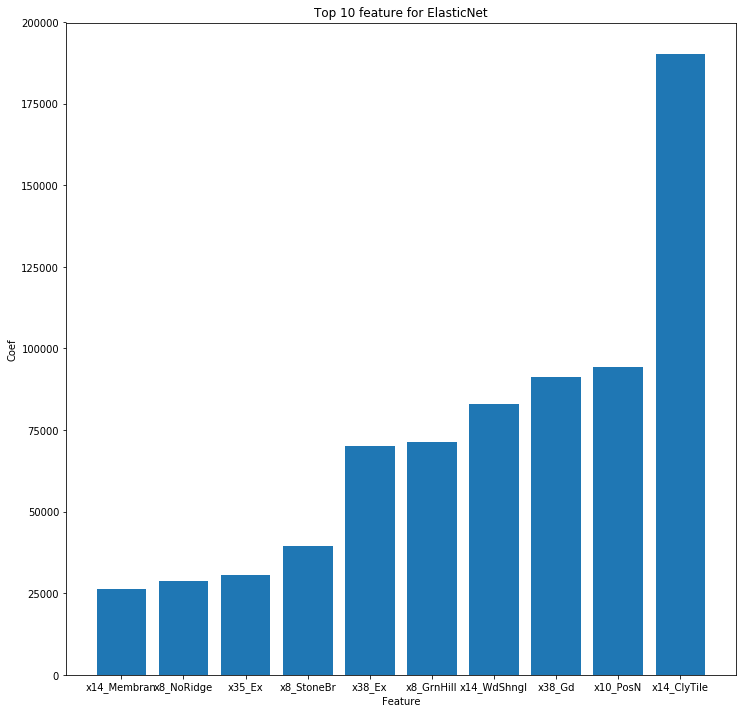

In [19]:
coef_en=np.abs(coef_en)
top_10_idx_en = np.argsort(coef_en)
top_10_features_en = [feature_en[i] for i in top_10_idx_en][-10:]
top_10_coef_en =[coef_en[i] for i in top_10_idx_en ][-10:]
fig, axes = plt.subplots(figsize=(12, 12))
plt.bar(top_10_features_en, top_10_coef_en, align='center')
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Top 10 feature for ElasticNet')

#### After I plot the top 10 features of each model, I notice they do agree on some features are important.
#### For example, x14_CityTile, x10_PosN, x8_GrnHill and x38_Ex